## import

In [1]:
import tensorflow._api.v2.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()

import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


## initialization


In [23]:
# variables
features = 3
categories = 2
x = tf.placeholder(tf.float32, [None, features])
y = tf.placeholder(tf.float32, [None, categories])
w = tf.Variable(tf.zeros([features,categories]))
b = tf.Variable(tf.zeros([categories]))

# functions
pred = tf.nn.softmax(tf.matmul(x, w) + b) # softMax function
loss = -tf.reduce_mean(y*tf.log(pred)) # Average cross entropy loss
alfa = 0.004
update = tf.train.GradientDescentOptimizer(0.001).minimize(loss)


## data
 x is  [ job,car,age ] and check if he is successful or not


In [18]:
data_x = [[1,1,46],[1,0,21],[0,1,61],[0,0,27],[0,0,32],[0,1,30],[1,0,10]]
data_y = [[1,0],[1,0],[1,0],[0,1],[0,1],[0,1],[0,1]]

data_t_x = [[1,1,27],[1,1,14],[1,0,12],[1,1,37]]
data_t_y = [[1,0],[0,1],[0,1],[1,0]]

## running the sim

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
show = 10
loss_in_time = []
w_arr = []
test_over_time = []
for i in range(0,100000):
       sess.run(update, feed_dict = {x:data_x, y:data_y})
       if(i%show==0 and i>100):
              tmp = sess.run(loss,feed_dict={x:data_x,y:data_y})
              loss_in_time.append(tmp)
              w_arr.append(sess.run(w))
              if(i%(show*50)==0):
                     print(f"i = {i}, loss = {tmp}")
              
              test_over_time.append(sess.run(loss,feed_dict={x:data_t_x,y:data_t_y}))


i = 500, loss = 0.3383682072162628
i = 1000, loss = 0.33365321159362793
i = 1500, loss = 0.32907989621162415
i = 2000, loss = 0.32464244961738586
i = 2500, loss = 0.3203352093696594
i = 3000, loss = 0.3161528706550598
i = 3500, loss = 0.31209033727645874
i = 4000, loss = 0.30814284086227417
i = 4500, loss = 0.3043057322502136
i = 5000, loss = 0.3005746006965637
i = 5500, loss = 0.29694536328315735
i = 6000, loss = 0.29341402649879456
i = 6500, loss = 0.28997674584388733
i = 7000, loss = 0.28662994503974915
i = 7500, loss = 0.2833702266216278
i = 8000, loss = 0.2801942229270935
i = 8500, loss = 0.27709880471229553
i = 9000, loss = 0.2740810513496399
i = 9500, loss = 0.2711380422115326
i = 10000, loss = 0.26826709508895874
i = 10500, loss = 0.2654655873775482
i = 11000, loss = 0.26273104548454285
i = 11500, loss = 0.2600610554218292
i = 12000, loss = 0.25745338201522827
i = 12500, loss = 0.2549057900905609
i = 13000, loss = 0.25241637229919434
i = 13500, loss = 0.24998287856578827
i = 14

## printing and testing

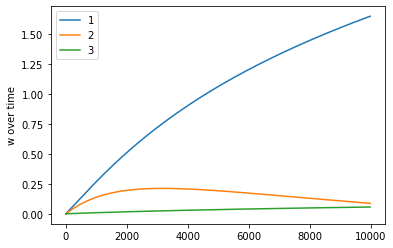

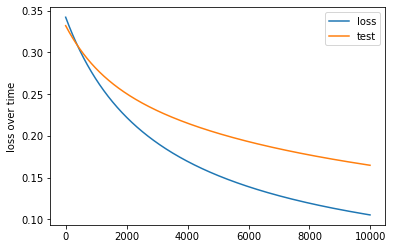

In [20]:
# TODO: add more w's and d
# TODO: add precision
d = np.array(np.array(w_arr).transpose()[0]).transpose()
plt.plot(d,label = [1,2,3])
plt.legend()
plt.ylabel('w over time')
plt.show()

plt.plot(loss_in_time,label ="loss")
plt.plot(test_over_time , label ="test")
plt.legend()
plt.ylabel('loss over time')
plt.show()

## show random check

In [22]:
print(sess.run(pred,feed_dict={x:[[0,1,70]]}))
print(sess.run(pred,feed_dict={x:[[0,1,20]]}))

[[0.9592744  0.04072561]]
[[0.05693396 0.943066  ]]
